In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the image directory (the folder where your images are stored)
image_directory = '/content/drive/MyDrive/Data Set/Defects'

# Create a list of categories (subdirectories)
categories = os.listdir(image_directory)

# Create empty lists to store image data and labels
X = []
y = []

# Load and preprocess images from categorized subdirectories
for category in categories:
    category_path = os.path.join(image_directory, category)
    image_files = os.listdir(category_path)
    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = image.load_img(img_path, target_size=(48, 48), grayscale=False)  # Load RGB images
        img = image.img_to_array(img)
        img /= 255.0
        X.append(img)
        y.append(category)

# Convert labels to numerical values
labels = pd.get_dummies(y)

X = np.array(X)
y = labels.values

# Split data into train and validation sets
X, y = shuffle(X, y, random_state=42)  # Shuffle the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(categories)

['Open Seam', 'High-low defects', 'non-defect']


In [5]:
# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))  # Updated input shape to (48, 48, 3)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y.shape[1], activation='softmax'))  # Output layer with the number of categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_val, y_val))

# Save the model
model.save('model_defects.h5')

Epoch 1/100
25/25 [==============================] - 17s 489ms/step - loss: 0.9955 - accuracy: 0.5716 - val_loss: 0.9221 - val_accuracy: 0.6050
Epoch 2/100
25/25 [==============================] - 12s 467ms/step - loss: 0.8579 - accuracy: 0.6734 - val_loss: 0.7519 - val_accuracy: 0.6950
Epoch 3/100
25/25 [==============================] - 13s 526ms/step - loss: 0.5587 - accuracy: 0.7915 - val_loss: 0.5108 - val_accuracy: 0.8450
Epoch 4/100
25/25 [==============================] - 13s 536ms/step - loss: 0.3851 - accuracy: 0.8693 - val_loss: 0.4113 - val_accuracy: 0.8350
Epoch 5/100
25/25 [==============================] - 14s 547ms/step - loss: 0.3438 - accuracy: 0.8807 - val_loss: 0.3645 - val_accuracy: 0.8650
Epoch 6/100
25/25 [==============================] - 14s 546ms/step - loss: 0.2613 - accuracy: 0.9058 - val_loss: 0.2406 - val_accuracy: 0.9300
Epoch 7/100
25/25 [==============================] - 13s 527ms/step - loss: 0.2794 - accuracy: 0.8995 - val_loss: 0.2802 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 502ms/step


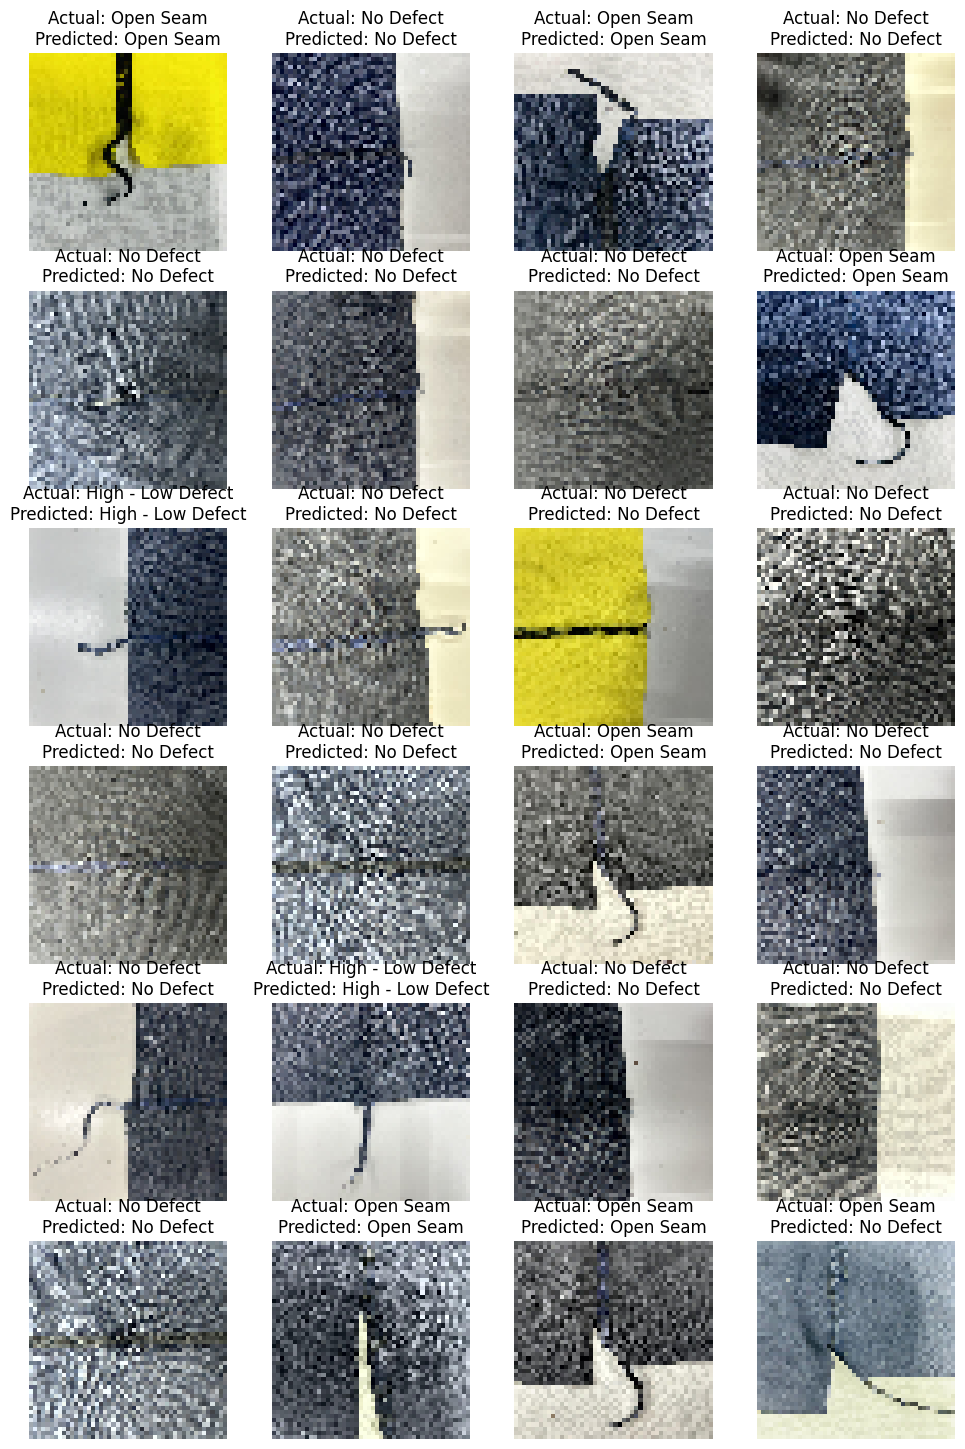

In [8]:


import matplotlib.pyplot as plt
import random
import numpy as np

# Data visualize
sample_size = 24
num_cols = 4
num_rows = sample_size // num_cols


random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ["High - Low Defect","Open Seam","No Defect"]

plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 3), cmap="gray")
    actual_class_index = np.argmax(sample_labels_actual[i])
    predicted_class_index = np.argmax(sample_labels_predicted[i])
    plt.title(f"Actual: {class_names[actual_class_index]}\nPredicted: {class_names[predicted_class_index]}")
    plt.axis('off')

plt.show()


In [11]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

# Upload an image file
uploaded = files.upload()

# Choose the uploaded image for prediction
for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image data

    # Use the model for prediction
    result = model.predict(img_array)
    predicted_class_index = np.argmax(result)
    predicted_class = class_names[predicted_class_index]

    print(f"Predicted class: {predicted_class}")


Saving 2024_04_02_11_16_IMG_8771.JPG to 2024_04_02_11_16_IMG_8771.JPG
1/1 [==============================] - 0s 25ms/step
Predicted class: Open Seam
